<a href="https://colab.research.google.com/github/amiramusannef/final_novelty_credit_card_fraud_detection/blob/main/final_novelty_credit_card_fraud_detection_using_ann_hybrid_auprc.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Credit Card Fraud Detection Using Explainable ANN


## General Acknowledgement

This model was developed based on a Kaggle notebook titled “Credit Card Fraud Detection using ML models” by Shalinee Kumari (https://github.com/Shalinee13/Credit-Card-Fraud-Detection-using-ML-models?tab=readme-ov-file), which provided data understanding, EDA, model building and model evaluation.
* Modifications: Implementation of Hybrid Sampling Technique and ANN model building including custom dropout, batch normalization, and callback tuning

## About Dataset:
Digital payments are evolving, but so are cyber crimes.
According to the Data Breach Index, more than 5 million records are being stolen on a daily basis, a concerning statistic that shows - fraud is still very common both for Card-Present and Card-not Present type of payments.
In today’s digital world where trillions of Card transaction happens per day, detection of fraud is challenging.
This Dataset sourced by some unnamed institute.

## Why This Topic is Important?
* Credit card (CC) fraud results in significant financial losses up to billions of dollar, affecting not only financial institutions but also millions of consumers worldwide

## Purpose of this Project?
* Much of the existing work emphasizes maximizing accuracy using advanced machine learning and deep learning models, often at the expense of interpretability.

> 1) Aim to input interpretability aspect to the model

> 2) Aim to find meaningful insights from model output

> 3) Aim to improve the gap between model performance and explainability

## Literature Review

* Credit card fraud detection using artificial neural network by Asha RB, Suresh Kumar
* Credit card fraud detection using state-of-art machine learning and deep learning algorithms by Fawaz Khaled Alarfaj, Iqra Malik, Hikmat Ullah Khan, Muhammad Ramzan, Muzamil Ahmed
* Hybrid undersampling and oversampling for imbalanced credit card data by Maram Alamri, Mourad Ykhlef

## Project Pipeline:

#### 1) Data Understanding

#### 2) Exploratory data analytics (EDA)

#### 3) Data Preprocessing

#### 4) Hybrid Sampling Technique

#### 5) Artificial Neural Network + SHAP


#### 6) Random Forest + Feature Importance Analysis


#### 7) Result Comparison and Model Evaluation

## Importing Libraries and Dataset:

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/card_transdata.csv')
data

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...
999995,2.207101,0.112651,1.626798,1.0,1.0,0.0,0.0,0.0
999996,19.872726,2.683904,2.778303,1.0,1.0,0.0,0.0,0.0
999997,2.914857,1.472687,0.218075,1.0,1.0,0.0,1.0,0.0
999998,4.258729,0.242023,0.475822,1.0,0.0,0.0,1.0,0.0


## Exploratory Data Analysis (EDA):

* There are total of 8 columns: 3 continous, 4 categorical,and 1 target column
* There are 1000000 rows
* Fraud is the target variable
* No missing values

In [5]:
data.shape

(1000000, 8)

In [6]:
data.columns

Index(['distance_from_home', 'distance_from_last_transaction',
       'ratio_to_median_purchase_price', 'repeat_retailer', 'used_chip',
       'used_pin_number', 'online_order', 'fraud'],
      dtype='object')

## Top 5 values

In [7]:
data.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0


## last 5 values

In [8]:
data.tail()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
999995,2.207101,0.112651,1.626798,1.0,1.0,0.0,0.0,0.0
999996,19.872726,2.683904,2.778303,1.0,1.0,0.0,0.0,0.0
999997,2.914857,1.472687,0.218075,1.0,1.0,0.0,1.0,0.0
999998,4.258729,0.242023,0.475822,1.0,0.0,0.0,1.0,0.0
999999,58.108125,0.318110,0.386920,1.0,1.0,0.0,1.0,0.0


In [9]:
print(data[data.isna().any(axis=1)])

Empty DataFrame
Columns: [distance_from_home, distance_from_last_transaction, ratio_to_median_purchase_price, repeat_retailer, used_chip, used_pin_number, online_order, fraud]
Index: []



## Feature Explanation:
distance_from_home - the distance from home where the transaction happened.

distance_from_last_transaction - the distance from last transaction happened.

ratio_to_median_purchase_price - Ratio of purchased price transaction to median purchase price.

repeat_retailer - Is the transaction happened from same retailer.

used_chip - Is the transaction through chip (credit card).

used_pin_number - Is the transaction happened by using PIN number.

online_order - Is the transaction an online order.

fraud - Is the transaction fraudulent.

## Finding the information of the data:

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 8 columns):
 #   Column                          Non-Null Count    Dtype  
---  ------                          --------------    -----  
 0   distance_from_home              1000000 non-null  float64
 1   distance_from_last_transaction  1000000 non-null  float64
 2   ratio_to_median_purchase_price  1000000 non-null  float64
 3   repeat_retailer                 1000000 non-null  float64
 4   used_chip                       1000000 non-null  float64
 5   used_pin_number                 1000000 non-null  float64
 6   online_order                    1000000 non-null  float64
 7   fraud                           1000000 non-null  float64
dtypes: float64(8)
memory usage: 61.0 MB


## Finding the Null Values in the Dataset:

In [11]:
data.isnull()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
999995,False,False,False,False,False,False,False,False
999996,False,False,False,False,False,False,False,False
999997,False,False,False,False,False,False,False,False
999998,False,False,False,False,False,False,False,False


In [12]:
data.isnull().sum()

,0
distance_from_home,0
distance_from_last_transaction,0
ratio_to_median_purchase_price,0
repeat_retailer,0
used_chip,0
used_pin_number,0
online_order,0
fraud,0


There are no null values in this datset.

## Handling duplicated values:

In [13]:
data.duplicated().sum()

np.int64(0)

In [14]:
data.shape

(1000000, 8)

##  Basic statistics:

In [15]:
data.describe()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000
mean,26.628792,5.036519,1.824182,0.881536,0.350399,0.100608,0.650552,0.087403
std,65.390784,25.843093,2.799589,0.323157,0.477095,0.300809,0.476796,0.282425
min,0.004874,0.000118,0.004399,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.878008,0.296671,0.475673,1.000000,0.000000,0.000000,0.000000,0.000000
50%,9.967760,0.998650,0.997717,1.000000,0.000000,0.000000,1.000000,0.000000
75%,25.743985,3.355748,2.096370,1.000000,1.000000,0.000000,1.000000,0.000000
max,10632.723672,11851.104565,267.802942,1.000000,1.000000,1.000000,1.000000,1.000000


###  Outliers treatments:

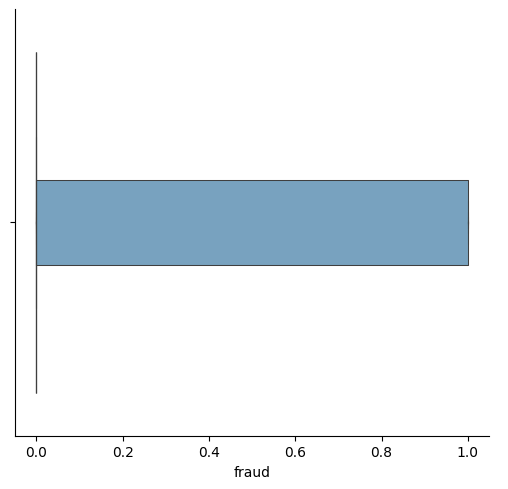

In [16]:
sns.catplot(x="fraud",kind="boxen",data=data)   ##box graph
plt.show()

In [17]:
y = data['fraud']
removed_outliers = y.between(y.quantile(.05), y.quantile(.95))
removed_outliers

,fraud
0,True
1,True
2,True
3,True
4,True
...,...
999995,True
999996,True
999997,True
999998,True


In [18]:
print(removed_outliers.value_counts())

fraud
True    1000000
Name: count, dtype: int64


There are no outliers.

## Value count of columns:

In [19]:
for i in data.columns:
  print(i, len(data[i].value_counts().index))

distance_from_home 1000000
distance_from_last_transaction 1000000
ratio_to_median_purchase_price 1000000
repeat_retailer 2
used_chip 2
used_pin_number 2
online_order 2
fraud 2


In [20]:
UsedChip = data['used_chip'].value_counts()

In [21]:
UsedChip.to_frame()

,count
used_chip,
0.0,649601
1.0,350399


In [22]:
UsedPin=data['used_pin_number'].value_counts()

In [23]:
UsedPin.to_frame()

,count
used_pin_number,
0.0,899392
1.0,100608


In [24]:
Fraud=data['fraud'].value_counts()
Fraud.to_frame()

,count
fraud,
0.0,912597
1.0,87403


In [25]:
order=data['online_order'].value_counts()
order.to_frame()

,count
online_order,
1.0,650552
0.0,349448


## Unique values of every columns:

In [26]:
data.nunique()

,0
distance_from_home,1000000
distance_from_last_transaction,1000000
ratio_to_median_purchase_price,1000000
repeat_retailer,2
used_chip,2
used_pin_number,2
online_order,2
fraud,2


## Data Insights:
In the given dataset, There are 87403 frauds which is 8.70% of given dataset.

In [27]:
fraud_c=pd.DataFrame(data["fraud"].value_counts())
fraud_c

,count
fraud,
0.0,912597
1.0,87403


In [28]:
data['fraud'] = data['fraud'].astype(int)

## "Categorical Variables"
 * Repeat Retailer: Most of the time transitions are in the same retailer.
 * Used Chip: Most of the time transitions are not using the chip, but we have a considerable number of transitions using the chip.
 * Used Pin Number: Most of the time transitions are not using the Pin Number.
 * Online Order: We have more Online Orders than Fisical.
 * Fraud: We have a few frauds in our database comparing to non frauds.

## Data Visualisation:

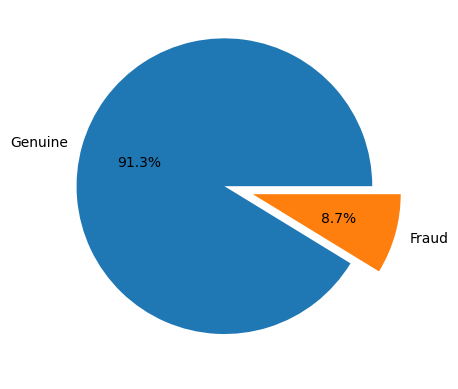

In [29]:
label_mapping = {0.0: "Genuine", 1.0: "Fraud"}  # Define label replacements
labels = [label_mapping[label] for label in fraud_c.index]  # Map index labels

plt.pie(fraud_c["count"], labels=labels, autopct='%.1f%%', explode=(0.2, 0))
plt.show()

The dataset is heavily imbalanced. As it can be seen from the charts, number of fraud transactions are significantly low when compared to non-fraud transactions.

In [30]:
fraud_c

,count
fraud,
0.0,912597
1.0,87403


### What Percent of Fraud Transactions Are Online?

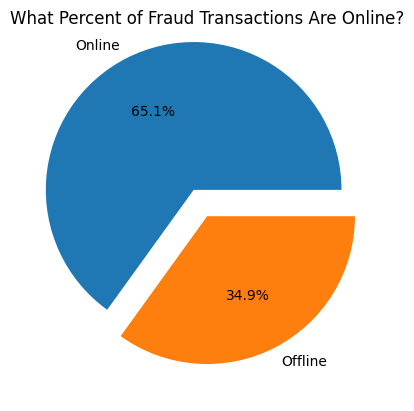

In [31]:
plt.pie(data["online_order"].value_counts(),labels=["Online","Offline"],autopct='%.1f%%', explode=(0.2,0))
plt.title("What Percent of Fraud Transactions Are Online?")
plt.show()


It shows maximum frauds have done by online which is 65.10% of given dataset.

### What Percentage of  frauds  happened using Pins?

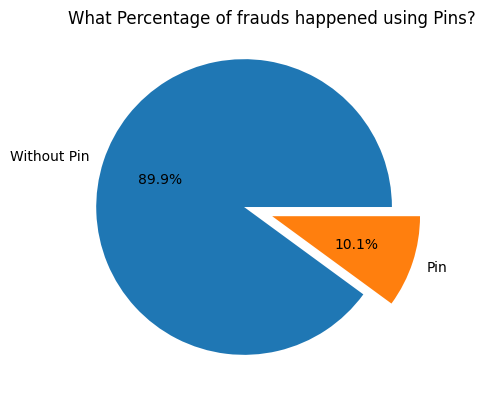

In [32]:
plt.pie(data['used_pin_number'].value_counts(),labels=["Without Pin","Pin"],autopct='%.1f%%', explode=(0.2,0))
plt.title("What Percentage of frauds happened using Pins?")
plt.show()

In [33]:
order=data['repeat_retailer'].value_counts()
order.to_frame()

,count
repeat_retailer,
1.0,881536
0.0,118464


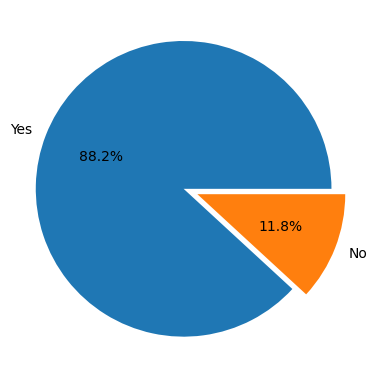

In [34]:
plt.pie(data["repeat_retailer"].value_counts(),labels=['Yes','No'],autopct='%.1f%%', explode=(0.1,0))
plt.show()

## Bivariate Analysis:
When we compare our variable target with others categorical variables, we can see some insights:

Most of the frauds are in the same retailer in a online purchase, without using the chip and without using the pin.¶

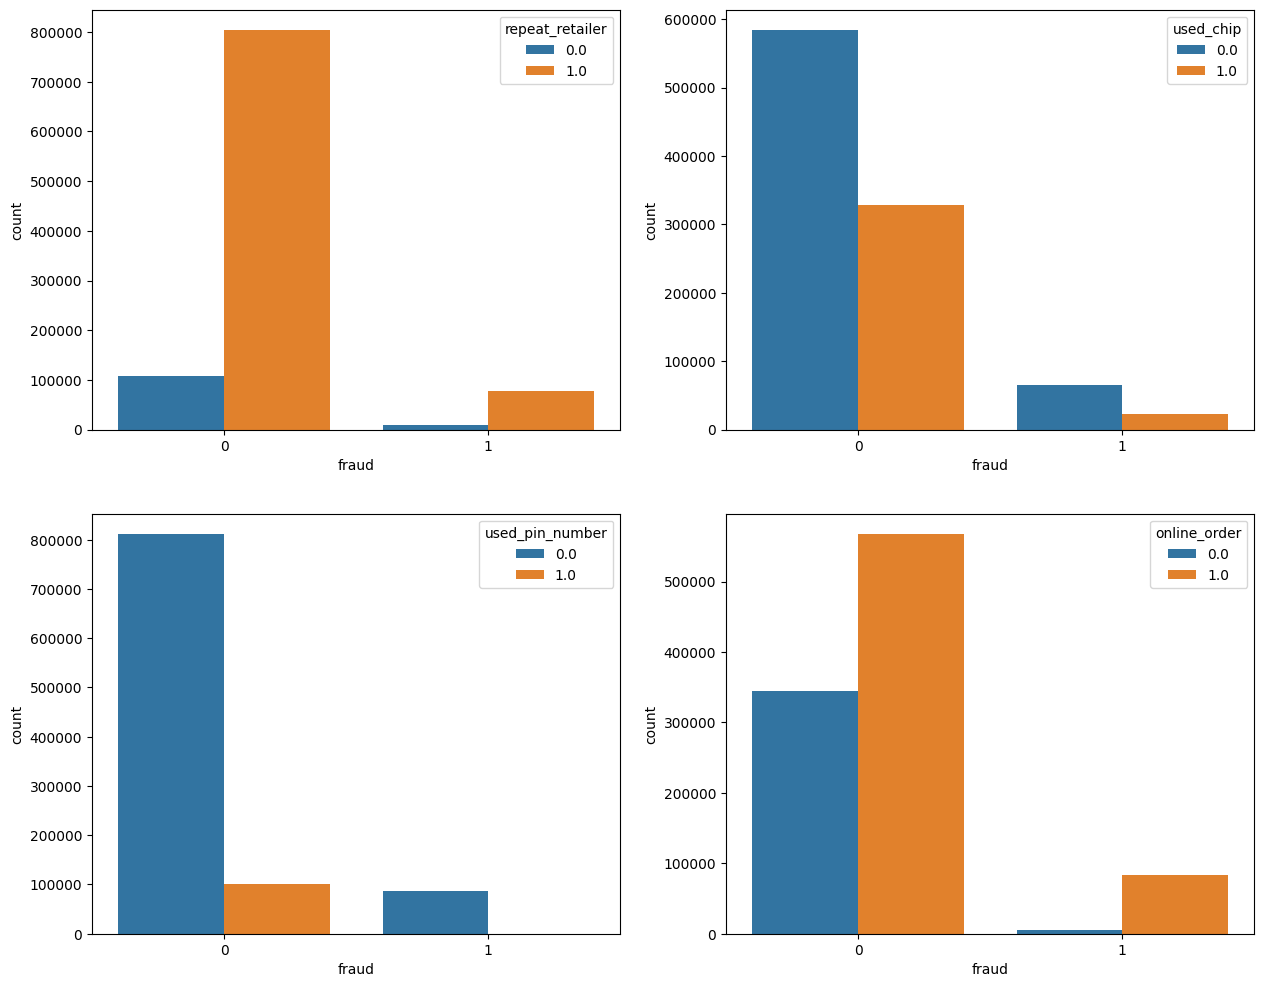

In [35]:
plt.figure(figsize = (15,12))

plt.subplot(2,2,1)
sns.countplot(x = 'fraud', hue= 'repeat_retailer', data = data)

plt.subplot(2,2,2)
sns.countplot(x = 'fraud', hue= 'used_chip', data = data)

plt.subplot(2,2,3)
sns.countplot(x = 'fraud', hue= 'used_pin_number', data = data)

plt.subplot(2,2,4)
sns.countplot(x = 'fraud', hue= 'online_order', data = data)
plt.show()

### Continuous Variables:
* Distance from home: Most of the time transitions are close to home.
* Distance from last transition: Most of the time transitions are close to the last transition.
* Ratio to Median Purchase time: Most of the time transitions are not much diferent than average.

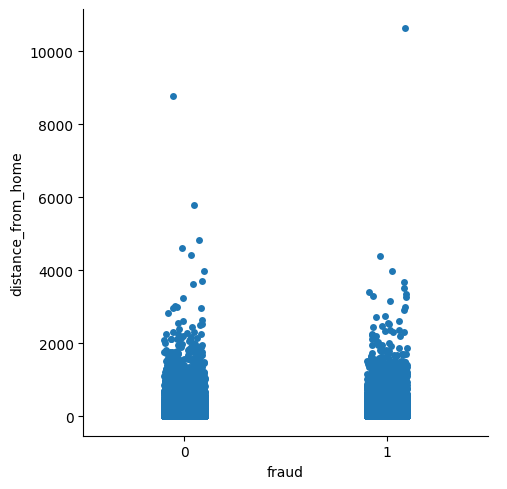

In [36]:
sns.catplot(x = "fraud", y = "distance_from_home", data = data)
plt.show()

When we compare our variable target with the variable Distance From Home we can see that we don't have a big difference, it's almost a same pattern.¶

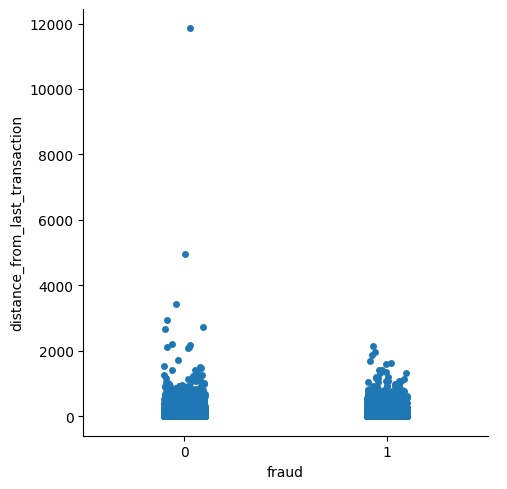

In [37]:
sns.catplot(x = "fraud", y = "distance_from_last_transaction",  data = data)
plt.show()

When we compare our variable target with the variable Distance From Last Transiction we can see that we don't have a big difference, it's almost a same pattern,

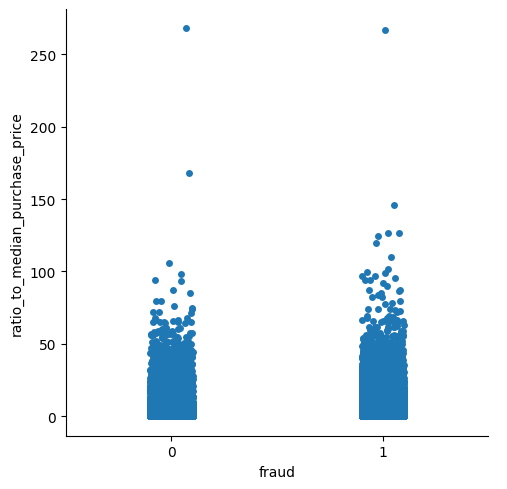

In [38]:
sns.catplot(x = "fraud", y = "ratio_to_median_purchase_price",  data = data)
plt.show()

When we compare our target variable with the Ratio to Median Purchase Time variable we can see that we have more frauds when the purchase value is far from the Median.¶

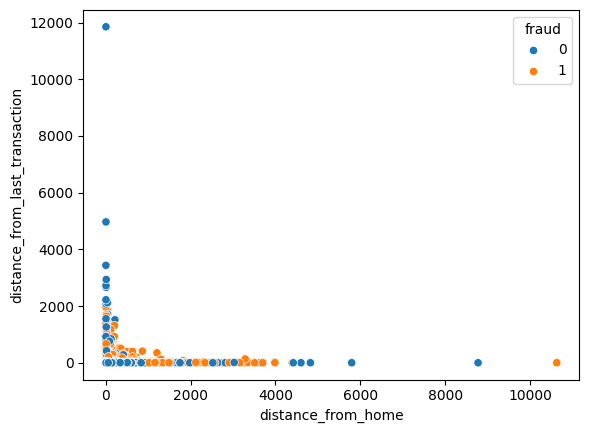

In [39]:
sns.scatterplot(x='distance_from_home', y='distance_from_last_transaction', data=data, hue='fraud')
plt.show()

## Making Dataset small just for Visualisation:

In [40]:
data_new = data.sample(n=10000, random_state=42)

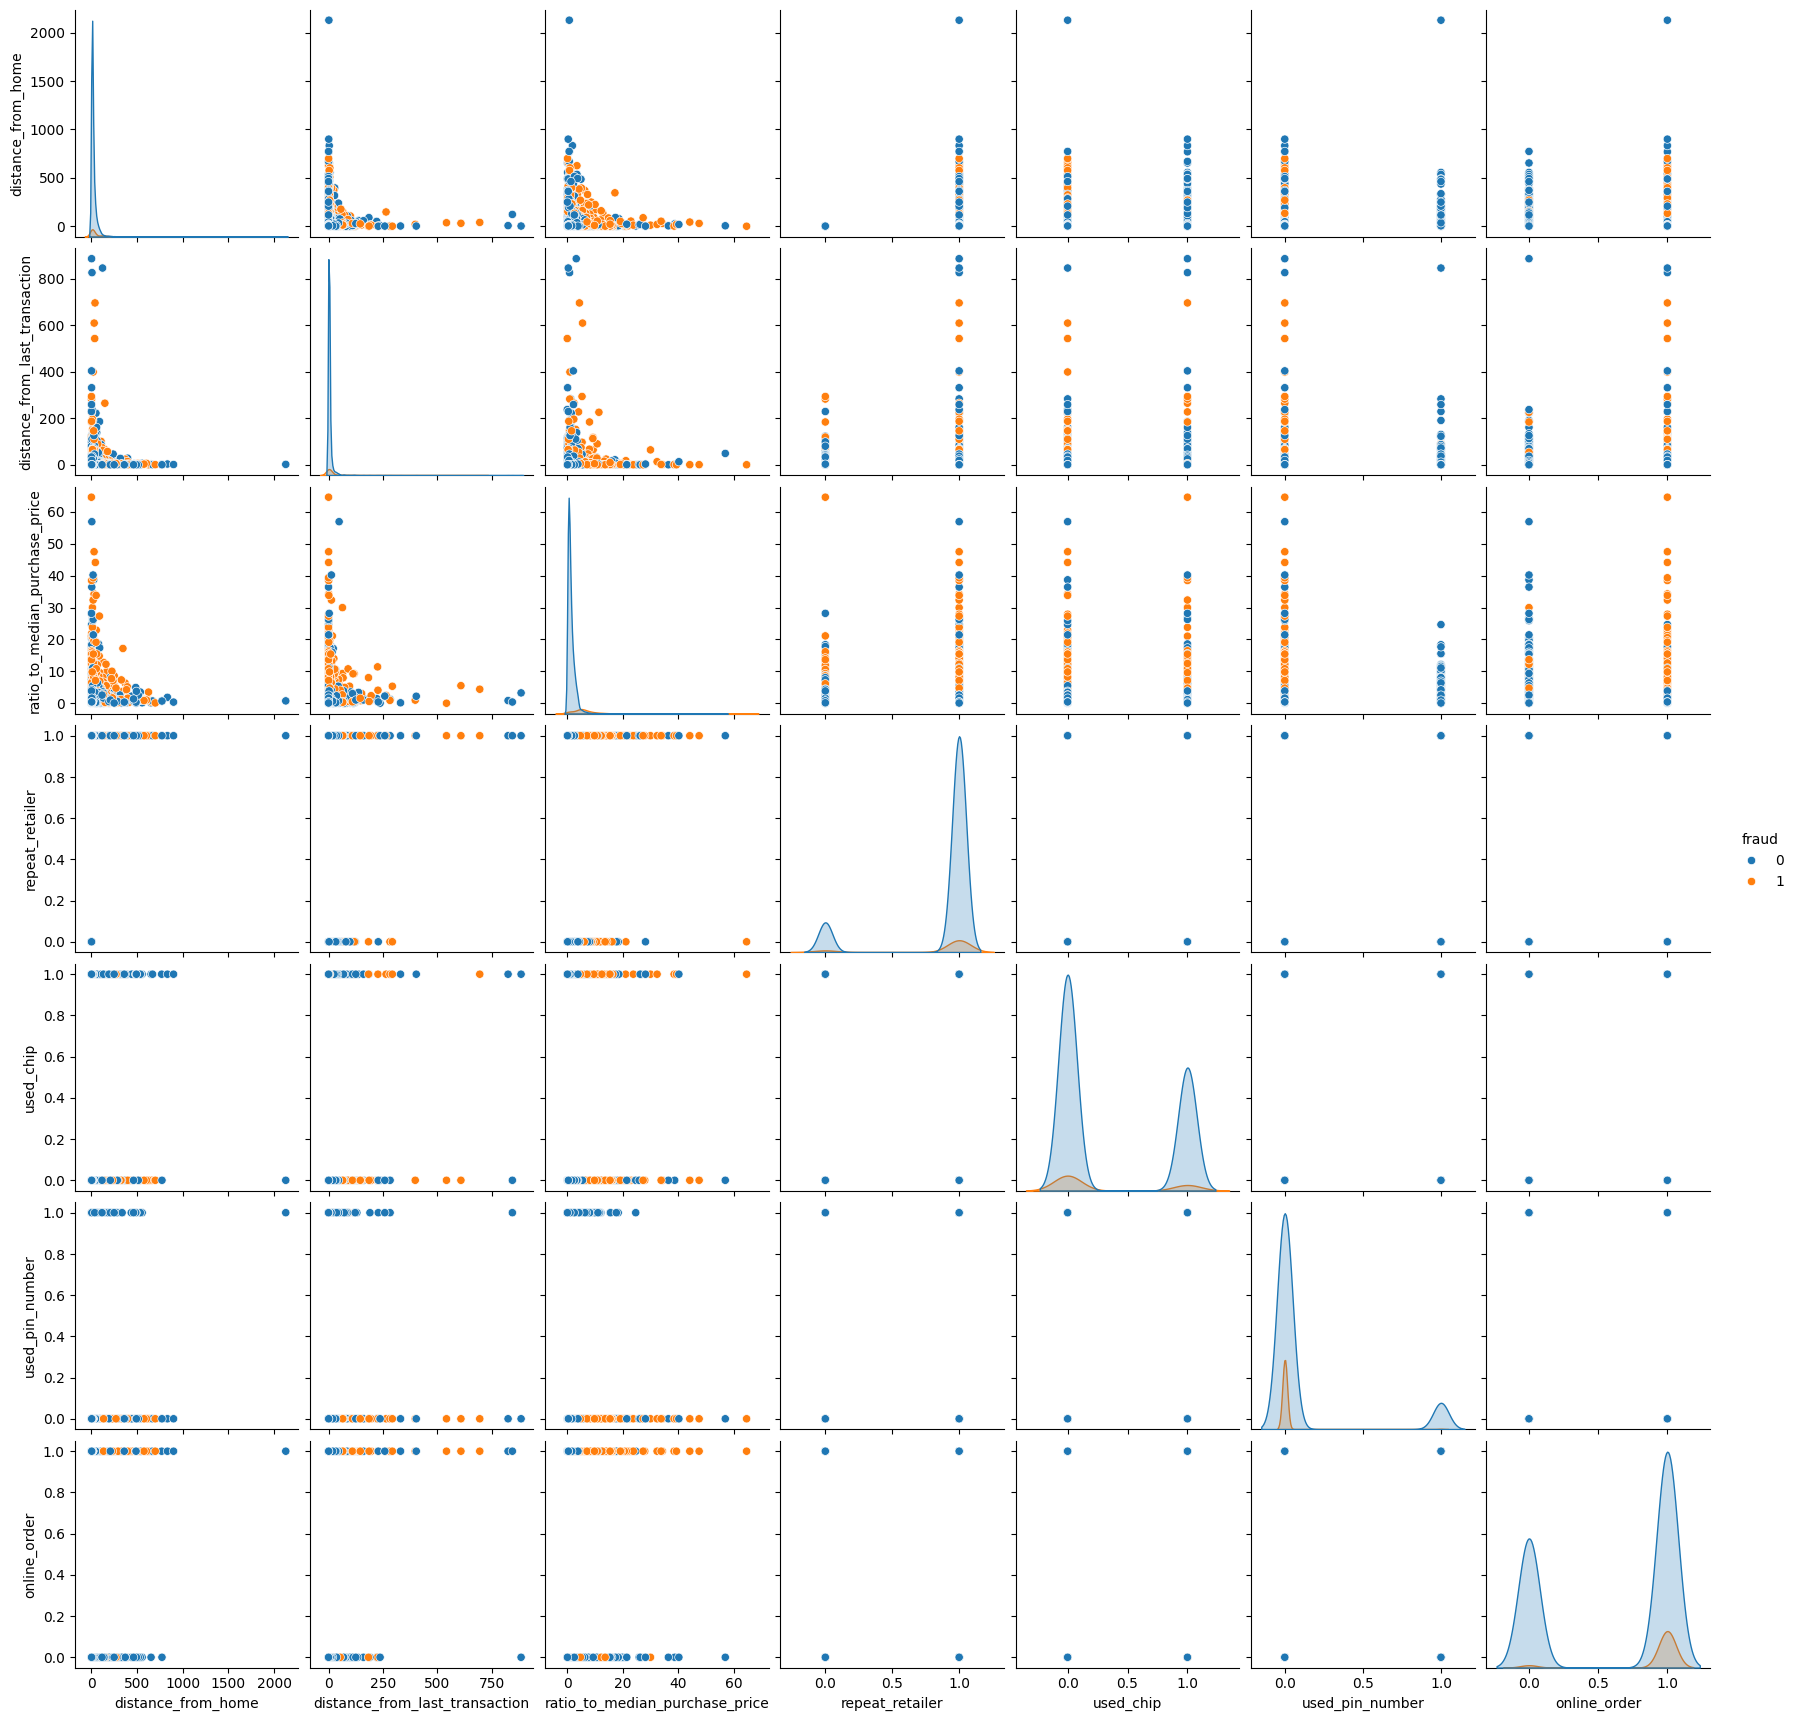

In [41]:
sns.pairplot(data_new ,hue='fraud')
plt.show()

## Correlation:

In [42]:
data.corr()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
distance_from_home,1.000000,0.000193,-0.001374,0.143124,-0.000697,-0.001622,-0.001301,0.187571
distance_from_last_transaction,0.000193,1.000000,0.001013,-0.000928,0.002055,-0.000899,0.000141,0.091917
ratio_to_median_purchase_price,-0.001374,0.001013,1.000000,0.001374,0.000587,0.000942,-0.000330,0.462305
repeat_retailer,0.143124,-0.000928,0.001374,1.000000,-0.001345,-0.000417,-0.000532,-0.001357
used_chip,-0.000697,0.002055,0.000587,-0.001345,1.000000,-0.001393,-0.000219,-0.060975
used_pin_number,-0.001622,-0.000899,0.000942,-0.000417,-0.001393,1.000000,-0.000291,-0.100293
online_order,-0.001301,0.000141,-0.000330,-0.000532,-0.000219,-0.000291,1.000000,0.191973
fraud,0.187571,0.091917,0.462305,-0.001357,-0.060975,-0.100293,0.191973,1.000000


Verifying the correlation between our variables, here we can see that we don't have a strong correlation.¶

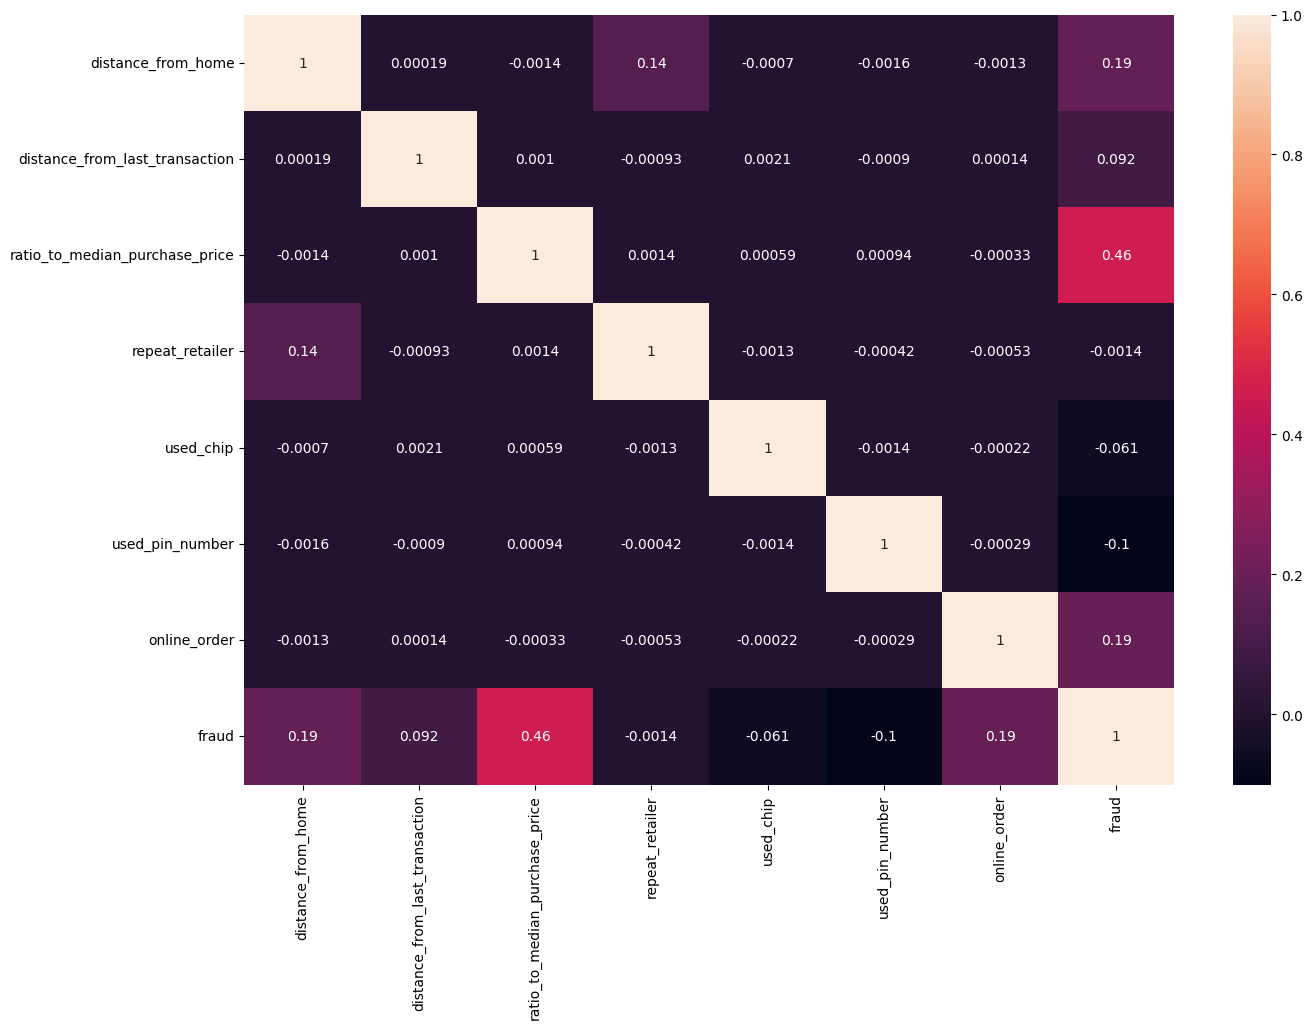

In [43]:
plt.figure(figsize = (15,10))
sns.heatmap(data.corr(), annot=True)

plt.show()

Most correlation values are very close to 0, which indicates that our features are weakly correlated

##### Putting feature variables into X

In [44]:
X=data.drop(["fraud"], axis = 1)

##### Putting target variable to y

In [45]:
Y=data["fraud"]

In [46]:
feature_names = X.columns

## Data Preprocessing

In [47]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.combine import SMOTETomek
from imblearn.over_sampling import SMOTE  # Import SMOTE instead of BorderlineSMOTE
import pandas as pd
import numpy as np


# Assuming you have your features in 'x' and target in 'y'
# First split the data into train and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y,
                                                    test_size=0.3,  # More standard split ratio
                                                    random_state=42,
                                                    stratify=Y)  # Preserve class distribution

# Then split train into train and validation sets
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train,
                                                 test_size=0.2,  # 20% of training for validation
                                                 random_state=42,
                                                 stratify=Y_train)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# Convert back to DataFrame if needed (assuming feature_names is defined)
feature_names = X.columns.tolist() if hasattr(X, 'columns') else [f'feature_{i}' for i in range(X.shape[1])]
X_train = pd.DataFrame(X_train_scaled, columns=feature_names)
X_val = pd.DataFrame(X_val_scaled, columns=feature_names)
X_test = pd.DataFrame(X_test_scaled, columns=feature_names)

## Hybrid Sampling Technique

In [ ]:
# Check class distribution
class_counts = Y_train.value_counts() # Changed y_train to Y_train
class_0_weight = class_counts[0] / len(Y_train)
class_1_weight = class_counts[1] / len(Y_train)

print(f"Class 0 (Non-Transaction) weight: {class_0_weight:.4f}")
print(f"Class 1 (Transaction) weight: {class_1_weight:.4f}")

# Implement hybrid sampling with Tomek Links and SMOTE
smote_tomek = SMOTETomek(
    smote=SMOTE(random_state=42),  # Use SMOTE directly
    tomek=None,
    sampling_strategy='auto',
    random_state=42
)

# Apply the hybrid sampling only to the training data
X_train_resampled, Y_train_resampled = smote_tomek.fit_resample(X_train, Y_train)

# Check new class distribution
new_class_counts = Y_train_resampled.value_counts()
new_class_0_weight = new_class_counts[0] / len(Y_train_resampled)
new_class_1_weight = new_class_counts[1] / len(Y_train_resampled)

print("\nAfter hybrid sampling:")
print(f"Class 0 (Non-Transaction) weight: {new_class_0_weight:.4f}")
print(f"Class 1 (Transaction) weight: {new_class_1_weight:.4f}")
print(f"Total samples after resampling: {len(Y_train_resampled)}")

Class 0 (Non-Transaction) weight: 0.9126
Class 1 (Transaction) weight: 0.0874


In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score, average_precision_score
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def evaluate_and_print_scores(y_true, y_pred_proba, model_name="Model", train=True, threshold=0.5):
    y_pred_binary = (y_pred_proba > threshold).astype(int)

    acc = accuracy_score(y_true, y_pred_binary)
    f1 = f1_score(y_true, y_pred_binary)
    auprc = average_precision_score(y_true, y_pred_proba)
    cm = confusion_matrix(y_true, y_pred_binary)
    clf_report = pd.DataFrame(classification_report(y_true, y_pred_binary, output_dict=True))

    title = "Train Result" if train else "Test Result"
    print(f"{title} - {model_name}:\n" + "="*50)
    print(f"Accuracy Score: {acc:.4f}")
    print(f"AUPRC: {auprc:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print("_________________")
    print(f"Classification Report:\n{clf_report}")
    print("_________________")
    print(f"Confusion Matrix:\n{cm}\n")

    return {
        "Accuracy": acc,
        "AUPRC": auprc,
        "F1": f1,
        "Confusion Matrix": cm.tolist()
    }



In [ ]:
print(X_train.shape)
print(X_test.shape)
print(X_val.shape)
print(Y_train.shape)
print(Y_test.shape)
print(Y_val.shape)

## Artificial Neural Network + SHAP


In [ ]:
#!pip install -q tensorflow

In [ ]:
# Impoting metrics
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
from sklearn.metrics import classification_report

In [ ]:
from tensorflow import keras
from tensorflow.keras import regularizers

scores_dict = {}

# Modified model architecture with adjustments for class imbalance and resampled data
model = keras.Sequential([
    keras.layers.Dense(256, activation='relu',
                      input_shape=(X_train_resampled.shape[-1],),
                      kernel_regularizer=regularizers.l2(0.001)),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.3),

    keras.layers.Dense(256, activation='relu',
                     kernel_regularizer=regularizers.l2(0.001)),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.3),

    keras.layers.Dense(128, activation='relu',  # Reduced neurons in last hidden layer
                     kernel_regularizer=regularizers.l2(0.0001)),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.3),

    keras.layers.Dense(1, activation='sigmoid')
])

# Custom metrics for imbalanced data
METRICS = [
    keras.metrics.BinaryAccuracy(name='accuracy'),
    keras.metrics.Precision(name='precision'),
    keras.metrics.Recall(name='recall'),
    keras.metrics.AUC(name='auc'),
    keras.metrics.AUC(name='prc', curve='PR')  # Precision-Recall curve
]

# Modified compilation with class weighting considerations
model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.0001),  # Lower learning rate
    loss='binary_crossentropy',
    metrics=METRICS
)

model.summary()

In [ ]:
# Enhanced callbacks
callbacks = [
    keras.callbacks.ModelCheckpoint(
        'fraud_model_best.keras',
        save_best_only=True,
        monitor='val_prc',  # Monitoring Precision-Recall AUC
        mode='max'
    ),
    keras.callbacks.EarlyStopping(
        monitor='val_prc',
        patience=10,
        verbose=1,
        mode='max',
        restore_best_weights=True
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor='val_loss',
        factor=0.1,
        patience=5,
        verbose=1,
        min_lr=1e-6
    )
]

# Train the model using the RESAMPLED data (no class weights needed)
r = model.fit(
    X_train_resampled, Y_train_resampled,  # Using resampled data
    validation_data=(X_val, Y_val),
    batch_size=2048,
    epochs=100,
    callbacks=callbacks,
    verbose=1
)

In [ ]:
score = model.evaluate(X_test, Y_test)
print(score)

In [ ]:
plt.figure(figsize=(12, 16))

plt.subplot(4, 2, 1)
plt.plot(r.history['loss'], label='Loss')
plt.plot(r.history['val_loss'], label='val_Loss')
plt.title('Loss Function evolution during training')
plt.legend()

"""
plt.subplot(4, 2, 2)
plt.plot(r.history['fn'], label='fn')
plt.plot(r.history['val_fn'], label='val_fn')
plt.title('Accuracy evolution during training')
plt.legend()
"""
plt.subplot(4, 2, 3)
plt.plot(r.history['precision'], label='precision')
plt.plot(r.history['val_precision'], label='val_precision')
plt.title('Precision evolution during training')
plt.legend()

plt.subplot(4, 2, 4)
plt.plot(r.history['recall'], label='recall')
plt.plot(r.history['val_recall'], label='val_recall')
plt.title('Recall evolution during training')
plt.legend()

In [ ]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Predict probabilities
y_train_pred_prob = model.predict(X_train)
y_test_pred_prob = model.predict(X_test)

# Evaluate and print
ann_train_scores = evaluate_and_print_scores(Y_train, y_train_pred_prob, model_name="ANN", train=True)
ann_test_scores = evaluate_and_print_scores(Y_test, y_test_pred_prob, model_name="ANN", train=False)

scores_dict['ANN'] = {
    'Train': {k: ann_train_scores[k] for k in ['Accuracy', 'AUPRC', 'F1']},
    'Test': {k: ann_test_scores[k] for k in ['Accuracy', 'AUPRC', 'F1']}
}

In [ ]:
#!pip install shap

In [ ]:
type(X_train)

In [ ]:
print(X_train.columns)

In [ ]:
import shap
import numpy as np

# Use a small subset of training data for SHAP baseline
X_background = X_train_resampled.sample(100, random_state=42)

# KernelExplainer needs a prediction function
explainer = shap.KernelExplainer(model.predict, X_background)

# Explain predictions on a few test samples
X_explain = X_test.sample(50, random_state=42)
shap_values = explainer.shap_values(X_explain)

# Plot feature importance
shap.summary_plot(shap_values, X_explain)

In [ ]:
# Wrapper to flatten model predictions for SHAP
predict_fn = lambda x: model.predict(x).flatten()

# Re-initialize explainer with the wrapper
explainer = shap.KernelExplainer(predict_fn, X_background)

# Recalculate SHAP values
shap_values = explainer.shap_values(X_explain)

# Plot again
shap.summary_plot(shap_values, X_explain)

## Random Forest + Feature Importance Analysis

In [ ]:
# Random Forest Model
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Train the model
model_rf = RandomForestClassifier(n_estimators=100, random_state=42)
model_rf.fit(X_train_resampled, Y_train_resampled)

# Predict probabilities
y_train_pred_proba_rf = model_rf.predict_proba(X_train)[:, 1]
y_test_pred_proba_rf = model_rf.predict_proba(X_test)[:, 1]

# Evaluate and print
rf_train_scores = evaluate_and_print_scores(Y_train, y_train_pred_proba_rf, model_name="Random Forest", train=True)
rf_test_scores = evaluate_and_print_scores(Y_test, y_test_pred_proba_rf, model_name="Random Forest", train=False)

# Store in dictionary
scores_dict['Random Forest'] = {
    'Train': {k: rf_train_scores[k] for k in ['Accuracy', 'AUPRC', 'F1']},
    'Test': {k: rf_test_scores[k] for k in ['Accuracy', 'AUPRC', 'F1']}
}

In [ ]:
# Get feature importances and sort them
importances = model_rf.feature_importances_
indices = np.argsort(importances)[::-1]
feature_names = X_train.columns

# Plot
plt.figure(figsize=(10, 6))
plt.title("Random Forest Feature Importances")
plt.barh(range(len(importances)), importances[indices], align='center')
plt.yticks(range(len(importances)), feature_names[indices])
plt.gca().invert_yaxis()  # Highest importance at the top
plt.xlabel("Importance Score")
plt.tight_layout()
plt.show()

## Comparing Accuracy of All Model:

In [ ]:
import pprint
pprint.pprint(scores_dict)

In [ ]:
import pandas as pd

# Flatten scores_dict into a 2D dictionary
flattened_scores = {}
for model_name, dataset_scores in scores_dict.items():
    for dataset_type, metrics in dataset_scores.items():
        key = f"{model_name} - {dataset_type}"
        flattened_scores[key] = metrics

# Create DataFrame
scores_df = pd.DataFrame.from_dict(flattened_scores, orient='index')

# Display final table
print("📋 Final Score Table:")
print(scores_df)

import matplotlib.pyplot as plt

scores_df.plot(kind='barh', figsize=(12, 6))
plt.title('Model Performance Comparison')
plt.xlabel('Score')
plt.ylabel('Model - Dataset')
plt.legend(title='Metric')
plt.tight_layout()
plt.show()

In [ ]:
!jupyter nbconvert --to notebook --output cleaned_notebook.ipynb your_notebook.ipynb